## Imports

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import cufflinks as cf
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from xgboost import XGBRegressor

import plotly.graph_objects as px


# Int cufflinks
# making all charts public and setting a global theme
cf.set_config_file(theme='ggplot',offline=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Set matplotlib in Darkmode
# plt.style.use('light_background')

# Set Pandas to display all columsn
pd.set_option("display.max.columns", None)


# Dataset Overview

### 01. Load the dataset

In [17]:
dataset = pd.read_csv('data_preprocessing/yield_df.csv', encoding='utf-8', index_col=[0])

### 02. Explore the dataset

Explore files

In [18]:
# Whole dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.7+ MB


Select files (<i>yield_df.csv</i>)

In [19]:
dataset.head(5)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [20]:
# Columns
columns = list(dataset.columns)
dataset.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [21]:
# Crops available 
dataset.Item.unique()


array(['Maize', 'Potatoes', 'Rice, paddy', 'Sorghum', 'Soybeans', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams'],
      dtype=object)

In [22]:
# Shows NA or NAN
dataset.isna().any()

Area                             False
Item                             False
Year                             False
hg/ha_yield                      False
average_rain_fall_mm_per_year    False
pesticides_tonnes                False
avg_temp                         False
dtype: bool

In [23]:
dataset.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [24]:
# Skew 
dataset.skew(numeric_only=True)

Year                             0.012243
hg/ha_yield                      1.793229
average_rain_fall_mm_per_year    0.853832
pesticides_tonnes                3.490289
avg_temp                        -0.741582
dtype: float64

In [25]:
# Check number of data for each crop 
dataset.groupby('Item').count()

,Area,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Item,,,,,,
Cassava,2045,2045,2045,2045,2045,2045
Maize,4121,4121,4121,4121,4121,4121
Plantains and others,556,556,556,556,556,556
Potatoes,4276,4276,4276,4276,4276,4276
"Rice, paddy",3388,3388,3388,3388,3388,3388
Sorghum,3039,3039,3039,3039,3039,3039
Soybeans,3223,3223,3223,3223,3223,3223
Sweet potatoes,2890,2890,2890,2890,2890,2890
Wheat,3857,3857,3857,3857,3857,3857


### 03. Plot Data

#### Plot variables distribution

array([[<AxesSubplot: title={'center': 'Year'}>,
        <AxesSubplot: title={'center': 'hg/ha_yield'}>],
       [<AxesSubplot: title={'center': 'average_rain_fall_mm_per_year'}>,
        <AxesSubplot: title={'center': 'pesticides_tonnes'}>],
       [<AxesSubplot: title={'center': 'avg_temp'}>, <AxesSubplot: >]],
      dtype=object)

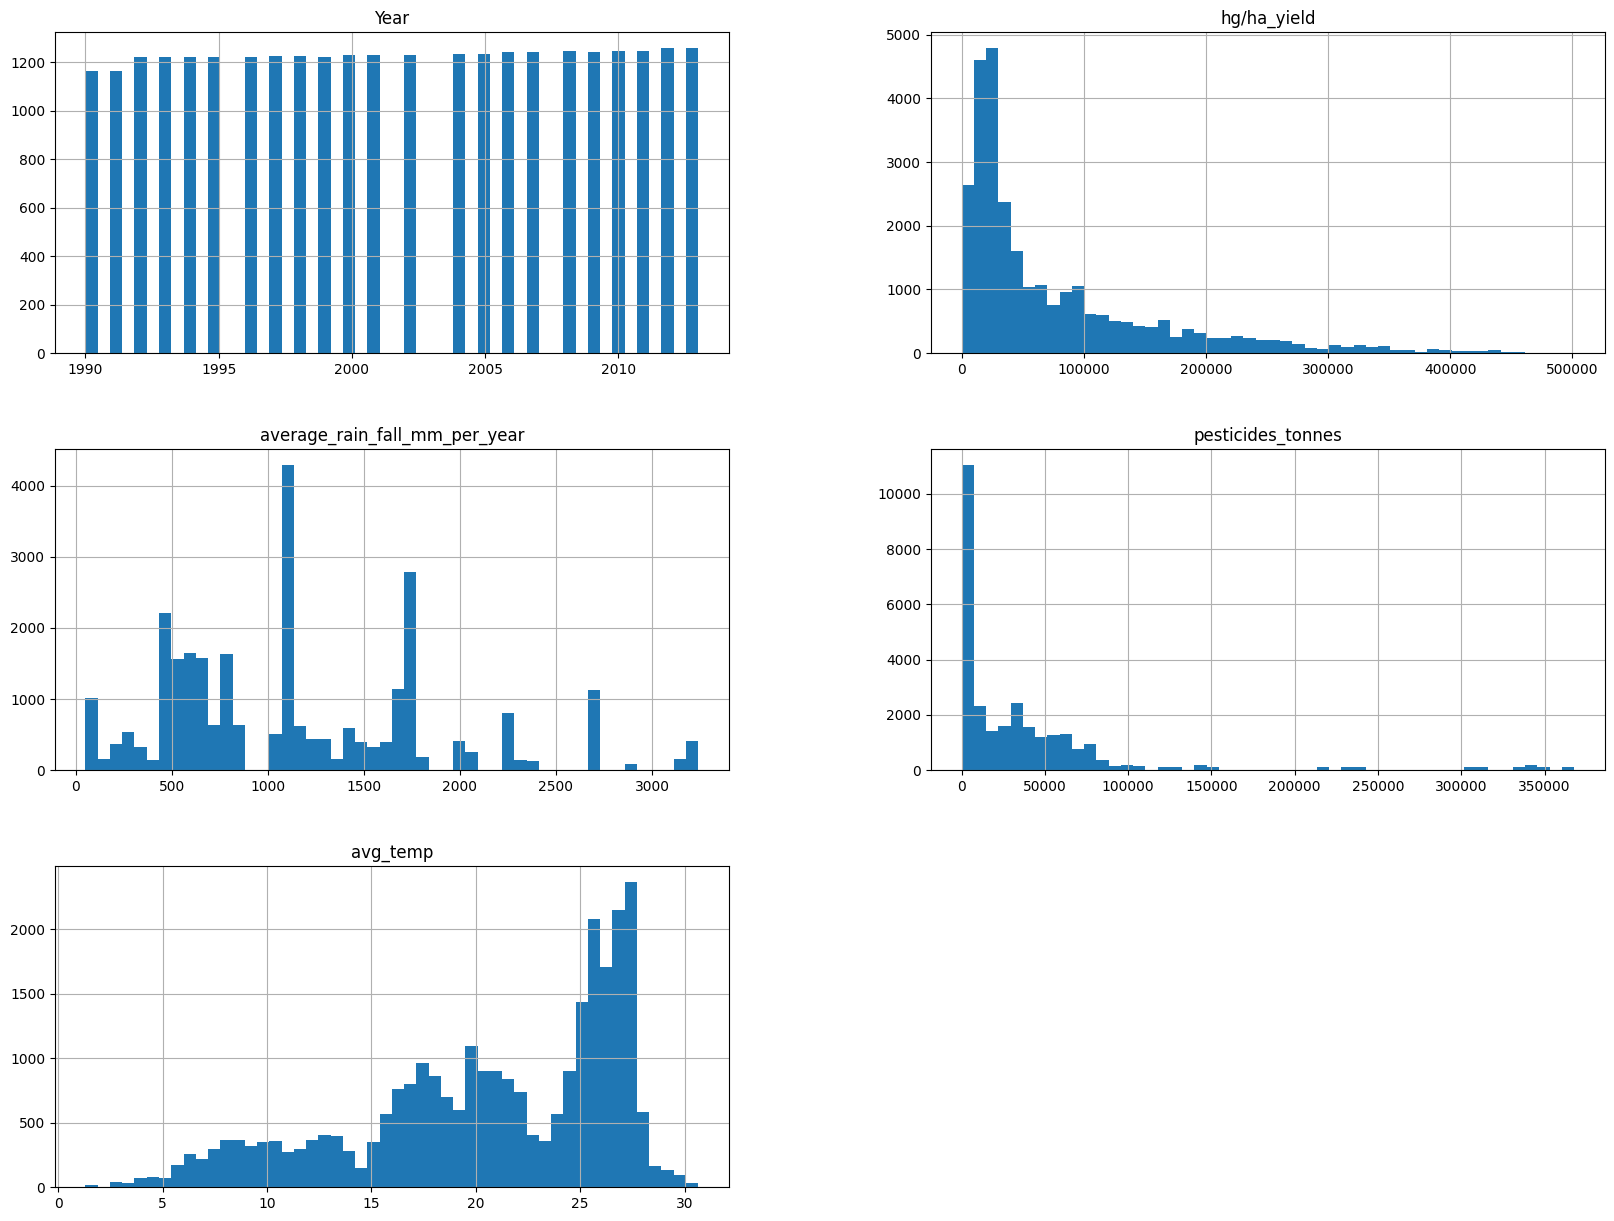

In [26]:
#Plot histograms of all the variables in the dataset
dataset.hist(bins=50, figsize = (20,15))

#### Correlation matrix

<AxesSubplot: >

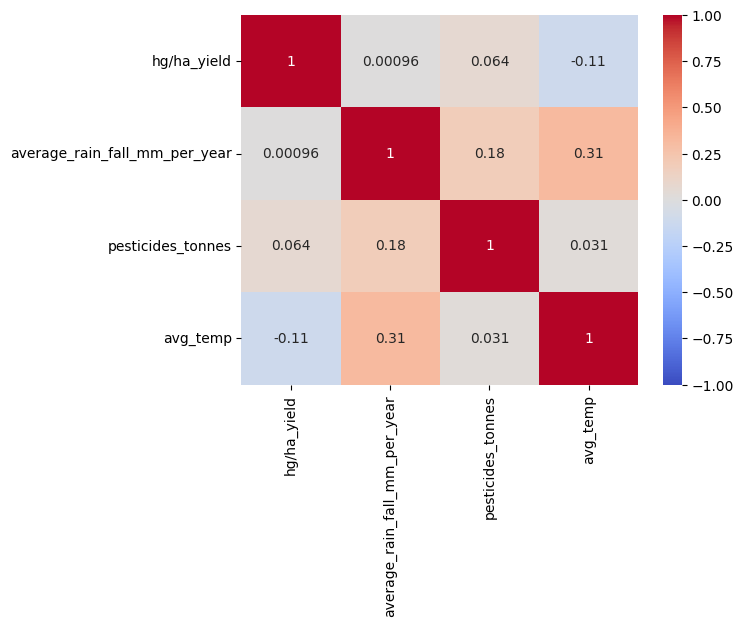

In [27]:
# Correlation data 
corr = dataset.drop('Year', axis=1).corr()

# Correlation matrix with seaborn (correlation val are -1 to 1, thats why vmin vmax)
sns.heatmap(corr, vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

# Data Preprocessing

### 04. Handle Categorical Variables

In [28]:
# Handle categorical variables
# OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# fit and transform the categorical data in Area and Item
encoded_data = encoder.fit_transform(dataset[['Item', 'Area']])
# convert encoded data to numpy arrays
# encoded = encoded_data.toarray()

# convert the encoded data back into a Pandas DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['Item', 'Area']))
df = pd.concat([dataset, encoded_df], axis=1)

In [29]:
# Turn yield into logaritmic
df['Log_Yield'] = np.log(df['hg/ha_yield'])

### 05. Remove Unnecesary Features

In [30]:
# Create features and labels (and remove categorical variables)
features = df.drop(['hg/ha_yield','Log_Yield','Item','Area', 'Year'], axis=1)
labels = df['Log_Yield']

### 06. Split Dataset

In [31]:
# Create training (75%) and test (25%) sets
features_train, features_test , labels_train , labels_test = train_test_split(features, labels, test_size =0.2, random_state=42)
# features_train, features_val, labels_train, labels_val = train_test_split(features_train, labels_train, test_size=0.2, random_state=42)

print(f'Train: {len(features_train)} features, {len(labels_train)} labels\
      \nTest: {len(features_test)} features, {len(labels_test)} labels')
    # \nVal: {len(features_val)} features, {len(labels_val)} labels\')

Train: 22593 features, 22593 labels      
Test: 5649 features, 5649 labels


# Feature Importance

In [ ]:
# initialize label encoder
le = LabelEncoder()

# encode the categorical variables
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])
        
# initialize the XGBoost model
model = xgb.XGBRegressor()

# train the model
model.fit(X_train, y_train)
    
# plot feature importance
xgb.plot_importance(model)
plt.show()

<AxesSubplot: >

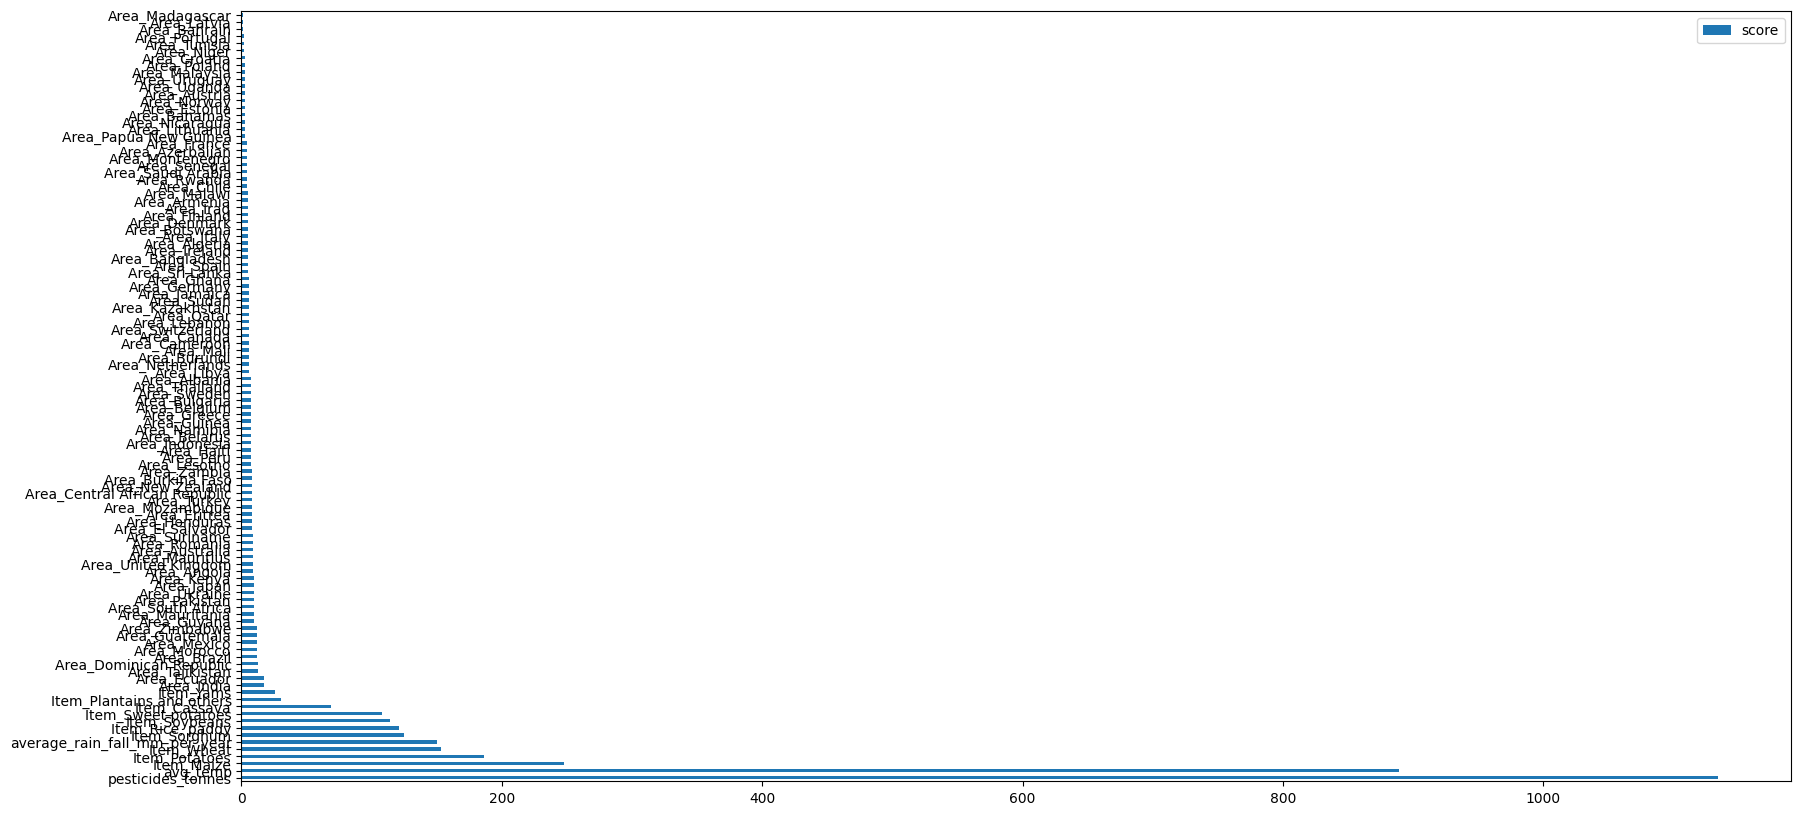

In [41]:
xgb = XGBRegressor()
best_params = {'rgs__learning_rate': 0.2, 'rgs__max_depth': 12, 'rgs__min_child_weight': 1, 'rgs__n_estimators': 250}

model = xgb.fit(features_train, labels_train)
feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.plot(kind='barh', figsize = (20,10))